In [42]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import sys
import cv2
if '..' not in sys.path:
    sys.path.append('..')

from stego.transform import blocking, dwt


In [43]:
original = pywt.data.camera()
cv2.imwrite("comp.jpg", original, [int(cv2.IMWRITE_JPEG_QUALITY), 80])
img = cv2.imread("comp.jpg")
compressed, g, b = cv2.split(img)


In [44]:
def get_diffs(original, modified, transform):
    o_coeffs = transform.forward(original)
    m_coeffs = transform.forward(modified)

    diffs = []

    for o, m in zip(o_coeffs[1:], m_coeffs[1:]):
        level = []
        for i in range(3):
            level.append(o[i] - m[i])
        diffs.append(level)
    return diffs

def plot_normal_distribution(data, ax):
    # Compute the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)

    # Create a histogram of the data
    ax.hist(data, bins=50, density=True)

    # Add vertical lines to indicate one and two standard deviations from the mean
    ax.axvline(mean - std, linestyle='dashed', color='red')
    ax.axvline(mean + std, linestyle='dashed', color='red')
    ax.axvline(mean - 2 * std, linestyle='dashed', color='orange')
    ax.axvline(mean + 2 * std, linestyle='dashed', color='orange')

    # Add text labels next to the vertical lines
    ax.text(mean - std, 0, f"{mean - std:.1f}", rotation=90, color='red')
    ax.text(mean + std, 0, f"{mean + std:.1f}", rotation=90, color='red')
    ax.text(mean - 2 * std, 0, f"{mean - 2 * std:.1f}", rotation=90, color='orange')
    ax.text(mean + 2 * std, 0, f"{mean + 2 * std:.1f}", rotation=90, color='orange')

    ax.set_xlabel("Value difference")
    ax.set_ylabel("Probability Density")

In [45]:
img = cv2.imread("../images/1.jpg")
img_1, g, b = cv2.split(img)
img = cv2.imread("../images/1_comp.jpg")
img_1_comp, g, b = cv2.split(img)

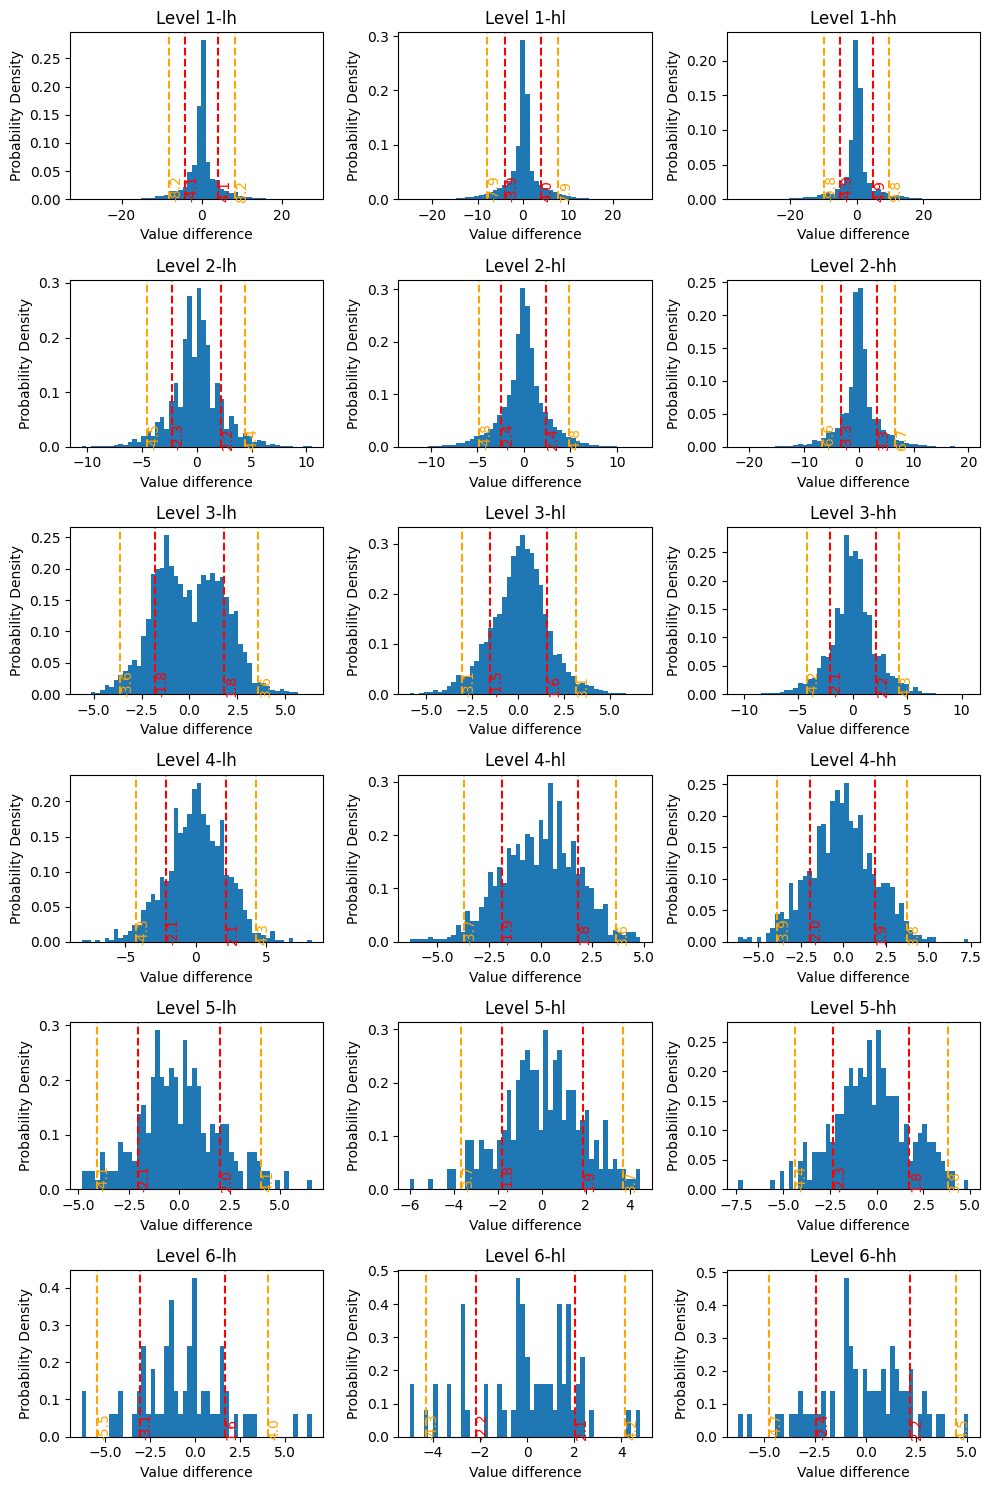

In [49]:

diffs = get_diffs(original, compressed, dwt.Dwt('haar', level=7))
fig, axs = plt.subplots(len(diffs)-1, 3, figsize=(10, 15))

for i, level in enumerate(diffs[-1:0:-1]):
    for j, (band, band_name) in enumerate(zip(level,["lh", "hl", "hh"])):
        plot_normal_distribution(band.ravel(), axs[i, j])
        axs[i, j].set_title(f"Level {i+1}-{band_name}")
        

fig.tight_layout()
# Show the plot
plt.show()


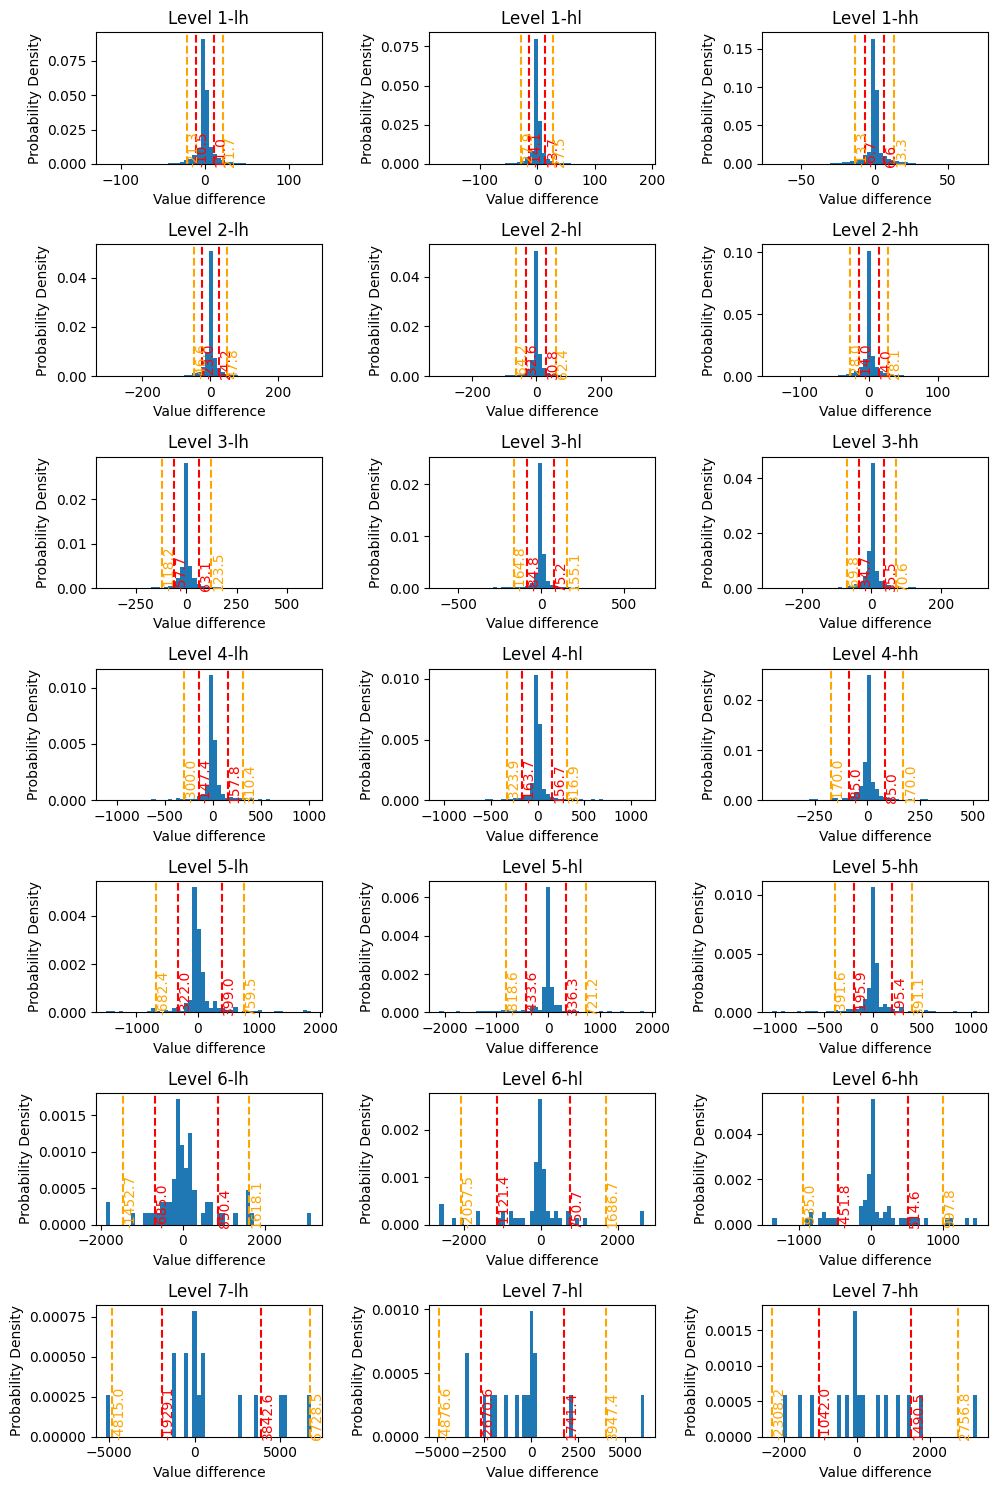

In [47]:
transform = dwt.Dwt('haar', level=7)

c = transform.forward(original)


fig, axs = plt.subplots(len(c)-1, 3, figsize=(10, 15))

for i, level in enumerate(c[-1:0:-1]):
    for j, (band, band_name) in enumerate(zip(level,["lh", "hl", "hh"])):
        plot_normal_distribution(band.ravel(), axs[i, j])
        axs[i, j].set_title(f"Level {i+1}-{band_name}")
        

fig.tight_layout()
# Show the plot
plt.show()